In [69]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, kmeans2, whiten

In [71]:
# load the data set
df = pd.read_csv('data/gps.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [72]:
coordinates = df.as_matrix(columns=['lon', 'lat'])

most_index = df['city'].value_counts().head(6).index
most = pd.DataFrame(df[df['city'].isin(most_index)])
most.drop_duplicates(subset=['city'], take_last=False, inplace=True)

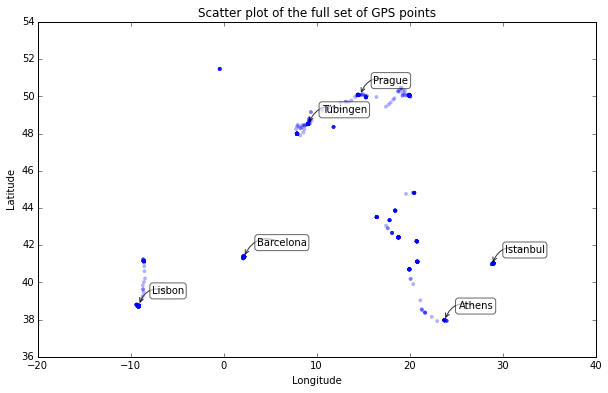

In [73]:
plt.figure(figsize=(10, 6), dpi=100)
co_scatter = plt.scatter(coordinates[:,0], coordinates[:,1], c='b', edgecolor='', s=15, alpha=0.3)

plt.title('Scatter plot of the full set of GPS points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i, row in most.iterrows():
    plt.annotate(row['city'].decode('utf-8'), 
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 1.5, row['lat'] + 0.6),
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.6),
                 xycoords='data',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k', alpha=0.8))
plt.show()

In [74]:
print len(coordinates)
print coordinates

print whiten(coordinates)
print np.array([[10,20,30],[20,30,40]])
print whiten(np.array([[10,20,30],[20,30,40]]))

1759
[[ -0.4510112  51.4812916]
 [ -0.4509991  51.474005 ]
 [ -0.446081   51.4781991]
 ..., 
 [ 11.7917104  48.3562848]
 [ 11.7917104  48.355328 ]
 [ 11.7913456  48.3571104]]
[[ -0.04168922  13.21373424]
 [ -0.0416881   13.21186398]
 [ -0.0412335   13.21294048]
 ..., 
 [  1.08996675  12.41163685]
 [  1.08996675  12.41139127]
 [  1.08993303  12.41184876]]
[[10 20 30]
 [20 30 40]]
[[ 2.  4.  6.]
 [ 4.  6.  8.]]


In [75]:
# N is the number of observations to group into k clusters
N = len(coordinates)

# normalize the coordinate
# each feature is divided by its standard deviation across all observations to give it unit variance.
w = whiten(coordinates)

# k is the number of clusters to form
k = 6



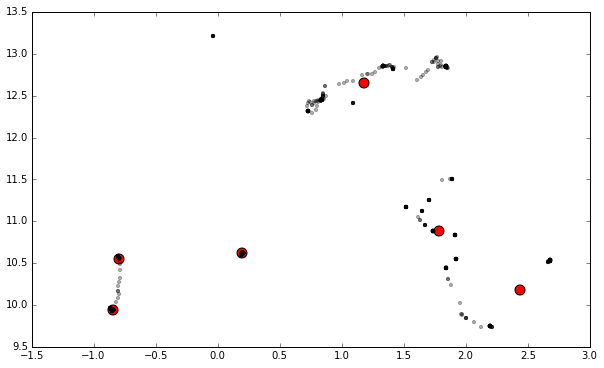

In [76]:
cluster_centroids2, closest_centroids = kmeans2(w, k, minit='points')

plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(cluster_centroids2[:,0], cluster_centroids2[:,1], c='r', s=100)
plt.scatter(w[:,0], w[:,1], c='k', alpha=.3, s=10)
plt.show()

In [77]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from time import time
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [78]:
db = DBSCAN(eps=3, min_samples=1).fit(coordinates)
labels = db.labels_

# number of clusters in labels, ignoring noise if present
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % num_clusters)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(coordinates, labels))

Estimated number of clusters: 6
Silhouette Coefficient: 0.768


In [79]:
def getCentroid(points):
    n = points.shape[0]
    sum_lon = np.sum(points[:, 1])
    sum_lat = np.sum(points[:, 0])
    return (sum_lon/n, sum_lat/n)

In [80]:
clusters = pd.Series([coordinates[labels == i] for i in xrange(num_clusters)])

lat = []
lon = []

for i, cluster in clusters.iteritems():  
    representative_point =getCentroid(cluster)
    lat.append(representative_point[0])
    lon.append(representative_point[1])

In [81]:
cl = pd.DataFrame({'lon':lon, 'lat':lat})
cl.head()

,lat,lon
0,51.477951,-0.446837
1,39.457970,-8.987528
2,41.381009,2.156992
3,49.248464,12.976368
4,41.187374,20.437422


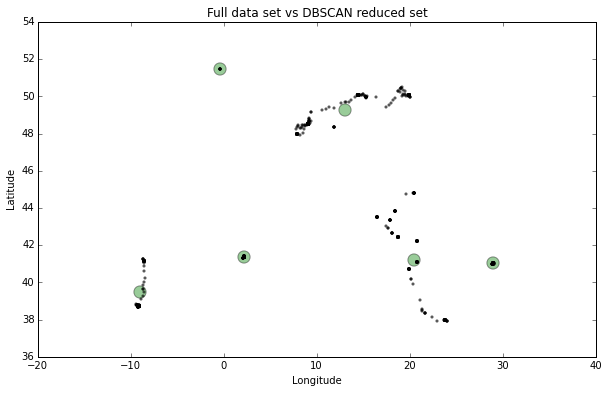

In [82]:
plt.figure(figsize=(10, 6))
rs_scatter = plt.scatter(lon, lat, c='g', alpha=.4, s=150)
df_scatter = plt.scatter(df['lon'], df['lat'], c='k', alpha=.5, s=5)

plt.title('Full data set vs DBSCAN reduced set')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [83]:
import pysal as ps  
import numpy as np  
import pandas as pd 

In [84]:
yp = np.arange(25)
yp.shape = (5, 5)
yp

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

<matplotlib.colorbar.Colorbar instance at 0x000000001463CB08>

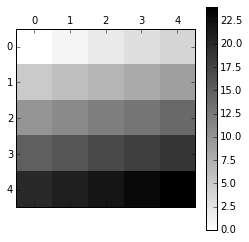

In [85]:
matshow(yp, cmap=cm.gray_r)
colorbar()

In [86]:
w = ps.lat2W(5, 5)
mr = ps.Moran(yp.flatten(), w)
mr.I

0.83999999999999997

In [87]:
yn = np.zeros((25,))
ids = range(0,25,2)
yn[ids] = 1
yn.shape = (5,5)

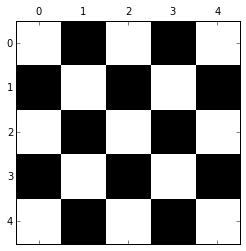

In [88]:
matshow(yn, cmap=cm.gray)

In [90]:
w = ps.lat2W(5, 5)
mr = ps.Moran(yn.flatten(), w)
mr.I

-0.99999999999999967

In [91]:
yr = np.arange(25)
#Shuffle the data randomly
np.random.shuffle(yr)
yr.shape = (5, 5)
yr

array([[19,  1,  0,  8, 18],
       [ 4,  2, 14, 15, 22],
       [ 5,  6, 17, 12, 21],
       [10, 11,  7, 20, 13],
       [ 9, 24,  3, 16, 23]])

<matplotlib.colorbar.Colorbar instance at 0x000000001413CF88>

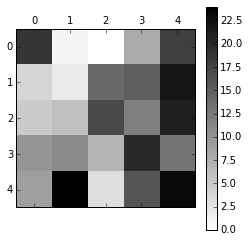

In [92]:
matshow(yr, cmap=cm.gray_r)
colorbar()

In [93]:
w = ps.lat2W(5, 5)
mr = ps.Moran(yr.flatten(), w)
mr.I

0.18326923076923074